In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
from sklearn.metrics import classification_report
import torch

In [2]:
import csv
import os
import shutil

# Define the base path where the folders containing audio files are located
base_path = 'openmic-2018/audio/'

# Define the destination path where you want to move the files
train_destination_path = 'dataset/train/'
test_destination_path = 'dataset/test/'

# Ensure the destination directory exists
# if not os.path.exists(train_destination_path):
#     os.makedirs(train_destination_path)
# if not os.path.exists(test_destination_path):
#     os.makedirs(test_destination_path)

# # Open and read the CSV file
# with open('openmic-2018/partitions/split01_train.csv') as csvfile:
#     filereader = csv.reader(csvfile)
#     for row in filereader:
#         # Extract the file name from the row (assuming there's no header and each row contains just the file name)
#         file_name = row[0]

#         # Construct the folder name from the first 3 characters of the file name
#         folder_name = file_name[:3]

#         # Construct the source path
#         source_path = os.path.join(base_path, folder_name, file_name + '.ogg')

#         # Construct the destination path
#         dest_file_path = os.path.join(train_destination_path, file_name + '.ogg')

#         # Move the file
#         shutil.move(source_path, dest_file_path)

#         print(f"Moved {source_path} to {dest_file_path}")
        
# # Open and read the CSV file
# with open('openmic-2018/partitions/split01_test.csv') as csvfile:
#     filereader = csv.reader(csvfile)
#     for row in filereader:
#         # Extract the file name from the row (assuming there's no header and each row contains just the file name)
#         file_name = row[0]

#         # Construct the folder name from the first 3 characters of the file name
#         folder_name = file_name[:3]

#         # Construct the source path
#         source_path = os.path.join(base_path, folder_name, file_name + '.ogg')

#         # Construct the destination path
#         dest_file_path = os.path.join(test_destination_path, file_name + '.ogg')

#         # Move the file
#         shutil.move(source_path, dest_file_path)

#         print(f"Moved {source_path} to {dest_file_path}")


In [3]:
#print how many files are in the train and test folders
print(len(os.listdir(train_destination_path)))
print(len(os.listdir(test_destination_path)))

14915
5085


In [5]:
# amplitude_train_path = 'amplitude_spectrogram/train/'
# amplitude_test_path = 'amplitude_spectrogram/test/'

In [6]:

# if not os.path.exists(amplitude_train_path):
#     os.makedirs(amplitude_train_path)
# # take only the first 1000 files
# for file in os.listdir(train_destination_path)[:100]:
#     y, sr = librosa.load(train_destination_path + file)
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
#     plt.figure(figsize=(6, 4))
#     img = librosa.display.specshow(D, sr=sr)
#     #remove .ogg extension from the file name
#     plt.savefig(amplitude_train_path + file[:-4] + ".png", bbox_inches='tight', pad_inches = 0)
#     plt.close()

In [7]:
# #load the image from the amplitude_spectrogram folder
# img = plt.imread(amplitude_train_path + "000046_3840.png")
# # img = img[:,:,:3]
# plt.imshow(img)
# #show the shape of the image
# print(img.shape)

In [8]:
# if not os.path.exists(amplitude_test_path):
#     os.makedirs(amplitude_test_path)
# for file in os.listdir(test_destination_path)[:10]:
#     y, sr = librosa.load(test_destination_path + file)
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
#     plt.figure(figsize=(6, 4))
#     img = librosa.display.specshow(D, sr=sr)
#     #remove .ogg extension from the file name
#     plt.savefig(amplitude_test_path + file[:-4] + ".png", bbox_inches='tight', pad_inches = 0)
#     plt.close()


In [4]:
power_train_path = 'power_spectrogram/train/'
power_test_path = 'power_spectrogram/test/'

In [10]:
if not os.path.exists(power_train_path):
    os.makedirs(power_train_path)
for file in os.listdir(train_destination_path)[:10]:
    y, sr = librosa.load(train_destination_path + file)
    # Compute the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(6, 4))
    img = librosa.display.specshow(log_S, sr=sr)

    #remove .ogg extension from the file name
    plt.savefig(power_train_path + file[:-4] + ".png", bbox_inches='tight', pad_inches = 0)
    plt.close()


In [5]:
print(len(os.listdir(power_train_path)))

14915


(224, 224, 3)


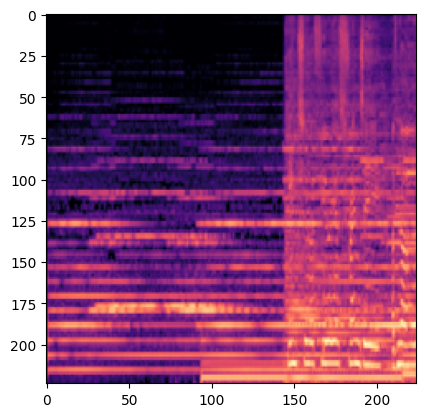

In [6]:
#load the image in the power_spectrogram folder
img = plt.imread(power_train_path + '/000046_3840.png')
# img = img[:,:,:3]
plt.imshow(img)
#print the shape of the image
print(img.shape)

In [32]:
if not os.path.exists(power_test_path):
    os.makedirs(power_test_path)
for file in os.listdir(test_destination_path)[2500:]:
    y, sr = librosa.load(test_destination_path + file)
    # Compute the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(6, 4))
    img = librosa.display.specshow(log_S, sr=sr)
    #remove .ogg extension from the file name
    plt.savefig(power_test_path + file[:-4] + ".png", bbox_inches='tight', pad_inches = 0)
    plt.close()

In [7]:
print(len(os.listdir(power_test_path)))

5085


(224, 224, 3)


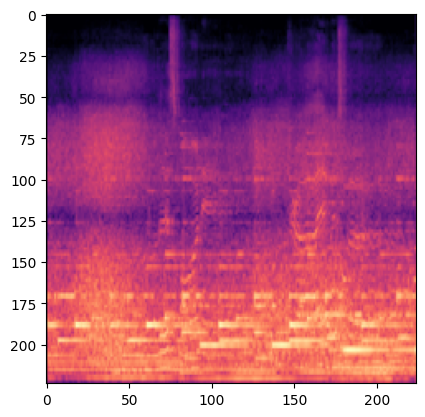

In [8]:
#load the image in the power_spectrogram folder
img = plt.imread(power_test_path + '/000178_3840.png')
# img = img[:,:,:3]
plt.imshow(img)
#print the shape of the image
print(img.shape)

In [9]:
DATA_ROOT = './openmic-2018'
OPENMIC = np.load(os.path.join(DATA_ROOT, 'openmic-2018.npz'), allow_pickle=True)
print(list(OPENMIC.keys()))

['X', 'Y_true', 'Y_mask', 'sample_key']


In [10]:
with open(os.path.join(DATA_ROOT, 'class-map.json'), 'r') as f:
    class_map = json.load(f)
print(class_map)

{'accordion': 0, 'banjo': 1, 'bass': 2, 'cello': 3, 'clarinet': 4, 'cymbals': 5, 'drums': 6, 'flute': 7, 'guitar': 8, 'mallet_percussion': 9, 'mandolin': 10, 'organ': 11, 'piano': 12, 'saxophone': 13, 'synthesizer': 14, 'trombone': 15, 'trumpet': 16, 'ukulele': 17, 'violin': 18, 'voice': 19}


In [11]:
Y_true, Y_mask, sample_key = OPENMIC['Y_true'], OPENMIC['Y_mask'], OPENMIC['sample_key']
print(Y_true.shape, Y_mask.shape, sample_key.shape)
print(sample_key[0])

(20000, 20) (20000, 20) (20000,)
000046_3840


In [12]:
split_train = pd.read_csv(os.path.join(DATA_ROOT, 'partitions/split01_train.csv'), 
                          header=None)
split_test = pd.read_csv(os.path.join(DATA_ROOT, 'partitions/split01_test.csv'), 
                         header=None)
print(split_train.shape, split_test.shape)
print(split_train.head())

(14915, 1) (5085, 1)
               0
0    000046_3840
1  000135_483840
2  000139_119040
3  000141_153600
4   000144_30720


In [13]:
print(os.listdir(power_train_path)[0][:-4])
print(split_train[0][0])
print(os.listdir(power_train_path)[0][:-4] == split_train[0][0])

# compare the sample_key in the split_train with file names in the power_spectrogram/train folder
i = 0
k = 0
for file in os.listdir(power_train_path):
    if file[:-4] == split_train[0][i]:
        k += 1
    i += 1
print(k, "matches found")

# compare the sample_key in the split_train with file names in the power_spectrogram/train folder
i = 0
k = 0
for file in os.listdir(power_test_path):
    if file[:-4] == split_test[0][i]:
        k += 1
    i += 1
print(k, "matches found")


000046_3840
000046_3840
True
14915 matches found
5085 matches found


In [14]:
train_set = []
test_set = []
for i in range(len(split_train)):
    train_set.append(split_train[0][i])
for i in range(len(split_test)):
    test_set.append(split_test[0][i])
print(len(train_set))
print(len(test_set))

14915
5085


In [15]:
# compare the sample_key in the split_train with file names in the power_spectrogram/train folder
i = 0
k = 0
for file in os.listdir(power_train_path):
    if file[:-4] == train_set[i]:
        k += 1
    i += 1
print(k, "matches found with train_set")

# compare the sample_key in the split_train with file names in the power_spectrogram/test folder
i = 0
k = 0
for file in os.listdir(power_test_path):
    if file[:-4] == test_set[i]:
        k += 1
    i += 1
print(k, "matches found with test_set")

14915 matches found with train_set
5085 matches found with test_set


In [16]:
print(train_set)
print(test_set)

['000046_3840', '000135_483840', '000139_119040', '000141_153600', '000144_30720', '000145_172800', '000154_288000', '000182_145920', '000189_207360', '000190_126720', '000195_280320', '000201_168960', '000202_142080', '000203_7680', '000205_61440', '000208_195840', '000211_49920', '000212_211200', '000237_34560', '000238_226560', '000247_76800', '000248_157440', '000250_26880', '000252_42240', '000253_126720', '000258_3840', '000282_207360', '000284_65280', '000384_161280', '000385_249600', '000386_65280', '000393_303360', '000395_119040', '000425_165120', '000438_245760', '000439_245760', '000442_157440', '000443_184320', '000446_26880', '000450_88320', '000473_138240', '000485_7680', '000493_42240', '000502_579840', '000504_203520', '000507_11520', '000512_7680', '000513_57600', '000525_119040', '000565_122880', '000575_69120', '000587_69120', '000601_38400', '000602_103680', '000605_3840', '000606_15360', '000607_76800', '000608_34560', '000615_326400', '000616_3840', '000640_49920

In [17]:
# These loops go through all sample keys, and save their row numbers
# to either idx_train or idx_test
#
# This will be useful in the next step for slicing the array data
idx_train, idx_test = [], []

for idx, n in enumerate(sample_key):
    if n in train_set:
        idx_train.append(idx)
    elif n in test_set:
        idx_test.append(idx)
    else:
        # This should never happen, but better safe than sorry.
        raise RuntimeError('Unknown sample key={}! Abort!'.format(sample_key[idx]))
        
# Finally, cast the idx_* arrays to numpy structures
idx_train = np.asarray(idx_train)
idx_test = np.asarray(idx_test)
print(idx_train.shape, idx_test.shape)

(14915,) (5085,)


In [18]:
Y_true_train = Y_true[idx_train]
Y_true_test = Y_true[idx_test]

Y_mask_train = Y_mask[idx_train]
Y_mask_test = Y_mask[idx_test]

print(Y_true_train.shape, Y_true_test.shape)
print(Y_mask_train.shape, Y_mask_test.shape)

(14915, 20) (5085, 20)
(14915, 20) (5085, 20)


In [19]:
for i in range(2):
    # print corresponding Y_true and Y_mask for each sample
    for j in range(20):
        print(Y_true_train[i][j], Y_mask_train[i][j])

0.5 False
0.5 False
0.5 False
0.5 False
0.17104999999999998 True
0.5 False
0.5 False
0.0 True
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.0 True
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.14705 True
0.5 False
0.5 False
0.0 True
0.5 False
0.5 False
1.0 True


In [26]:
from PIL import Image

In [46]:
for file in os.listdir(power_train_path):
    try:
        img = Image.open(power_train_path + file)
        if img.size != (224, 224):
            img = img.resize((224, 224))
        img = img.convert('RGB')
        img.save(power_train_path + file)
    except:
        print(file)
        continue

(224, 224, 3)


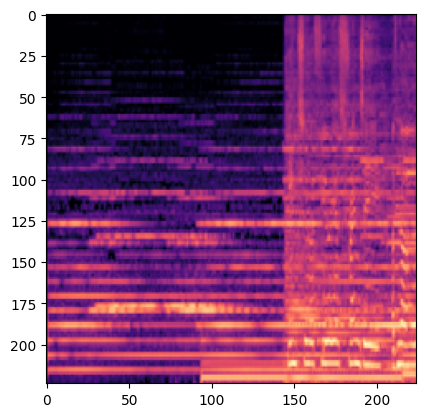

In [20]:
#load an image from the power_spectrogram folder
img = plt.imread(power_train_path + '/000046_3840.png')
plt.imshow(img)
print(img.shape)

In [50]:
for file in os.listdir(power_test_path):
    try:
        img = Image.open(power_test_path + file)
        if img.size != (224, 224):
            img = img.resize((224, 224))
        img = img.convert('RGB')
        img.save(power_test_path + file)
    except:
        print(file)
        continue

(224, 224, 3)


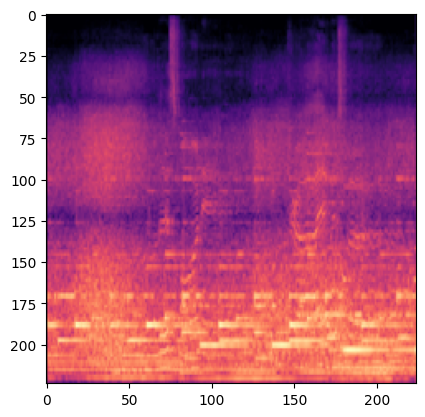

In [21]:
img = plt.imread(power_test_path + '/000178_3840.png')
plt.imshow(img)
print(img.shape)

In [22]:
for i in range(Y_true_train.shape[0]):
    for j in range(20):
        if Y_true_train[i][j] < 0.5:
            Y_true_train[i][j] = 1 - Y_true_train[i][j]

In [23]:
for i in range(Y_true_test.shape[0]):
    for j in range(20):
        if Y_true_test[i][j] < 0.5:
            Y_true_test[i][j] = 1 - Y_true_test[i][j]

In [24]:
import torchvision.transforms as transforms

In [27]:
# Define transformations to apply to the images
transform = transforms.Compose( # composing several transforms together
    [transforms.ToTensor(), # to tensor object
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]
)

# Define the path to the folder containing the train image data
train_data_path = power_train_path

# Load the image data
train_dataset = []

for file in os.listdir(train_data_path)[:5000]:
    img = Image.open(train_data_path + file)
    img = transform(img)
    train_dataset.append(img)

# convert the list to a numpy array
train_dataset = torch.stack(train_dataset)

In [28]:
Y_train = torch.tensor(Y_true_train, dtype=torch.float32)
label_train = torch.tensor(Y_mask_train.astype(int))

In [29]:
print(Y_train.shape)
print(label_train.shape)

torch.Size([14915, 20])
torch.Size([14915, 20])


In [31]:
# split train_dataset into train and validation sets with y_mask into train and validation sets
X_train = train_dataset[:4000]
X_val = train_dataset[4000:5000]
Y_ground_train = Y_train[:4000]
Y_ground_val = Y_train[4000:5000]
Y_label_train = label_train[:4000]
Y_label_val = label_train[4000:5000]

print(X_train.shape, X_val.shape)
print(Y_ground_train.shape, Y_ground_val.shape)
print(Y_label_train.shape, Y_label_val.shape)

torch.Size([4000, 3, 224, 224]) torch.Size([1000, 3, 224, 224])
torch.Size([4000, 20]) torch.Size([1000, 20])
torch.Size([4000, 20]) torch.Size([1000, 20])


In [32]:
# Define transformations to apply to the images
transform = transforms.Compose( # composing several transforms together
    [transforms.ToTensor(), # to tensor object
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]
)

# Define the path to the folder containing the train image data
test_data_path = power_test_path

# Load the image data
test_dataset = []

for file in os.listdir(test_data_path)[:500]:
    img = Image.open(test_data_path + file)
    img = transform(img)
    test_dataset.append(img)

# convert the list to a numpy array
test_dataset = torch.stack(test_dataset)

In [33]:
Y_test = torch.tensor(Y_true_test, dtype=torch.float32)
label_test = torch.tensor(Y_mask_test.astype(int))

In [35]:
X_test = test_dataset[:500]
Y_ground_test = Y_test[:500]
Y_label_test = label_test[:500]

print(X_test.shape)
print(Y_ground_test.shape)
print(Y_label_test.shape)
print(Y_label_test[1])

torch.Size([500, 3, 224, 224])
torch.Size([500, 20])
torch.Size([500, 20])
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int32)


In [36]:
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim

In [37]:
# Load the pre-trained resnet18 model
resnet18 = models.resnet18(pretrained=True)

f:\mlenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\mlenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [38]:
# Load the pre-trained vgg19 model
vgg19 = models.vgg19(pretrained=True)

f:\mlenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [40]:
from torchsummary import summary

# Specify input size (e.g., (3, 224, 224) for RGB images of size 224x224)
input_size = (3, 224, 224)

# Print detailed summary of the model
summary(vgg19, input_size=input_size, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [41]:
# Define the model where first layers are from restnet18 and the last layer is a fully connected layer with 20 output nodes
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.resnet18 = models.resnet18(pretrained=True)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(1000, 20)
    def forward(self, x):
        x = self.resnet18(x)
        x = self.relu(x)
        x = self.fc(x)
        x = torch.sigmoid(x)
        return x
        

In [42]:
def train(model, X_train, Y_ground_train, Y_label_train, X_val, Y_ground_val, Y_label_val, num_epochs, batch_size, criterion, optimizer):
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            x = X_train[i:i+batch_size]
            y = Y_train[i:i+batch_size]
            y_label = Y_label_train[i:i+batch_size]
            # make y_label float
            y_label = y_label.type(torch.FloatTensor)
            y_pred = model(x)
            # print(y_pred)
            loss = criterion(y_pred, y_label)
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [43]:
model = Model()

f:\mlenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\mlenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [44]:
batch_size = 64
num_classes = 20
learning_rate = 0.001
num_epochs = 1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
train(model, X_train, Y_ground_train, Y_label_train, X_val, Y_ground_val, Y_label_val, num_epochs, batch_size, criterion, optimizer)

Epoch [1/1], Loss: 0.8351
Epoch [1/1], Loss: 0.4074
Epoch [1/1], Loss: 0.3080
Epoch [1/1], Loss: 0.3810
Epoch [1/1], Loss: 0.4152
Epoch [1/1], Loss: 0.3642
Epoch [1/1], Loss: 0.3509
Epoch [1/1], Loss: 0.3877
Epoch [1/1], Loss: 0.3840
Epoch [1/1], Loss: 0.3827
Epoch [1/1], Loss: 0.3502
Epoch [1/1], Loss: 0.3281
Epoch [1/1], Loss: 0.3933
Epoch [1/1], Loss: 0.3539
Epoch [1/1], Loss: 0.3297
Epoch [1/1], Loss: 0.3327
Epoch [1/1], Loss: 0.3732
Epoch [1/1], Loss: 0.3481
Epoch [1/1], Loss: 0.3300
Epoch [1/1], Loss: 0.3475
Epoch [1/1], Loss: 0.3385
Epoch [1/1], Loss: 0.3340
Epoch [1/1], Loss: 0.3203
Epoch [1/1], Loss: 0.3263
Epoch [1/1], Loss: 0.3624
Epoch [1/1], Loss: 0.3421
Epoch [1/1], Loss: 0.3097
Epoch [1/1], Loss: 0.3584
Epoch [1/1], Loss: 0.3196
Epoch [1/1], Loss: 0.3041
Epoch [1/1], Loss: 0.3305
Epoch [1/1], Loss: 0.3521
Epoch [1/1], Loss: 0.2961
Epoch [1/1], Loss: 0.3167
Epoch [1/1], Loss: 0.3359
Epoch [1/1], Loss: 0.2920
Epoch [1/1], Loss: 0.2813
Epoch [1/1], Loss: 0.3020
Epoch [1/1],

In [48]:
#infer the model
def infer(model, X_test, Y_ground_test, Y_label_test, criterion):
    with torch.no_grad():
        y_pred = model(X_test)
        Y_label_test = Y_label_test.type(torch.FloatTensor)
        loss = criterion(y_pred, Y_label_test)
        print('Loss: {:.4f}'.format(loss.item()))
        return y_pred

In [49]:
y_pred = infer(model, X_test, Y_ground_test, Y_label_test, criterion)

Loss: 0.3125


In [52]:
print(Y_label_test[0])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       dtype=torch.int32)


In [54]:
print(y_pred[0])

tensor([0.0281, 0.0950, 0.2439, 0.0950, 0.1142, 0.0265, 0.0208, 0.1772, 0.0426,
        0.1766, 0.0454, 0.0504, 0.1015, 0.0290, 0.0739, 0.1838, 0.1565, 0.0816,
        0.0819, 0.1579])


device(type='cuda')